# Analysing the solution of the Poiseuille flow 

In [2]:
# Add the path where the PostProcess.py
# Replace MPLBDir with your own path
import sys
sys.path.append("MPLBDir/Src")

In [5]:
from PostProcess import ReadBlockData
import numpy as np
import matplotlib.pyplot as plt

The mayavi module cannot be imported! Please install it for three-dimensional visualisation!


In [6]:
variables=[{'name':'rho'},{'name':'u'},{'name':'v'},{'name':'w'},{'name':'NodeType_Fluid'},{'name':'CoordinateXYZ','len':3}]

In [7]:
# The NS solution
def NSSol(y,g,tau):
    return (g*y-g*y*y)/(2*tau)

In [8]:
# define which variable to read from HDF5 file
variables=[{'name':'rho'},{'name':'u'},{'name':'v'},{'name':'w'},{'name':'NodeType_Fluid'},{'name':'CoordinateXYZ','len':3}]

In [9]:
data=ReadBlockData("Poiseuille_Channel_T121600.h5",variables)

Reading  {'name': 'rho'} ...
Reading  {'name': 'u'} ...
Reading  {'name': 'v'} ...
Reading  {'name': 'w'} ...
Reading  {'name': 'NodeType_Fluid'} ...
Reading  {'name': 'CoordinateXYZ', 'len': 3} ...


In [12]:
ysol=np.arange(0,1.01,0.01)
usol=NSSol(ysol,0.0001,0.001)

In [46]:
u1=data['u'][1,:,1]
y1=data['Y'][1,:,1]
u0=data['u'][0,:,1]
y0=data['Y'][0,:,1]
u2=data['u'][2,:,1]
y2=data['Y'][2,:,1]


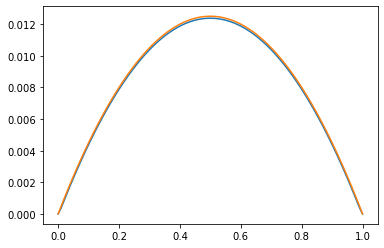

In [47]:
plt.plot(y1,u1)
plt.plot(ysol,usol)


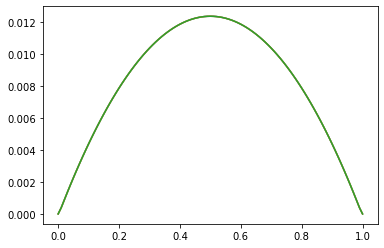

In [48]:
plt.plot(y1,u1)
plt.plot(y2,u2)
plt.plot(y0,u0)

In [31]:
# Check if the periodic boundary condition leads to a nearly homogeneous state in the X direction 
print("L2 norm error between x=0 and x=2:",np.sqrt(np.sum((data['u'][0,:,1]-data['u'][-1,:,1])*(data['u'][0,:,1]-data['u'][-1,:,1]))/np.sum(data['u'][0,:,1]*data['u'][0,:,1])))
print("L2 norm error between x=0 and x=1:",np.sqrt(np.sum((u0-u1)*(u0-u1))/np.sum(u1*u1)))

L2 norm error between x=0 and x=2: 1.750246127983183e-07
L2 norm error between x=0 and x=1: 8.425907432617994e-05


In [27]:
# Check if the periodic boundary condition leads to a nearly homogeneous state in the Z direction 
print("L2 norm error between z=0 and z=2:",np.sqrt(np.sum((data['u'][1,:,0]-data['u'][1,:,-1])*(data['u'][1,:,0]-data['u'][1,:,-1]))/np.sum(data['u'][1,:,-1]*data['u'][1,:,-1])))
print("L2 norm error between z=0 and z=1:",np.sqrt(np.sum((data['u'][1,:,0]-data['u'][1,:,1])*(data['u'][1,:,0]-data['u'][1,:,1]))/np.sum(data['u'][1,:,1]*data['u'][1,:,1])))


L2 norm error between z=0 and z=2: 5.517327650622377e-15
L2 norm error between z=0 and z=1: 0.0003147433351292892


In [35]:
data['u'][:,-1,:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [33]:
data['v'][:,-1,:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [34]:
data['w'][:,-1,:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [36]:
data['u'][:,0,:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [37]:
data['v'][:,0,:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [38]:
data['w'][:,0,:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])